Utilization of Python's scikit-learn machine learning package's implementation of support vector machines for classification tasks on varying datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy.io import loadmat

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
raw_data = loadmat('ex6data1.mat')

In [6]:
data = pd.DataFrame(raw_data['X'], columns=['x1', 'x2'])
data['y'] = raw_data["y"]

In [7]:
data.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [8]:
positive = data[data.y == 1]
negative = data[data.y == 0]

In [9]:
print positive.shape, negative.shape

(21, 3) (30, 3)


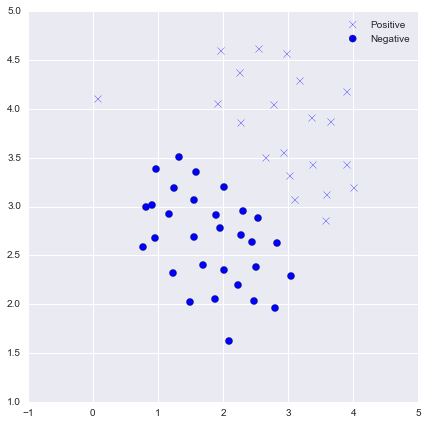

In [11]:
#Dataset that is nearly linearly separable.
plt.figure(figsize=(7, 7))
plt.scatter(positive["x1"], positive["x2"], s=50, marker="x", label="Positive")
plt.scatter(negative["x1"], negative["x2"], s=50, marker="o", label="Negative")
plt.legend()

In [12]:
from sklearn import svm

In [13]:
svc = svm.LinearSVC(C=1.0, loss="hinge", max_iter=1000)

In [14]:
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [15]:
svc.fit(data[["x1", "x2"]], data["y"])
svc.score(data[["x1", "x2"]], data["y"])

0.98039215686274506

In [16]:
svc2 = svm.LinearSVC(C=100.0, loss="hinge", max_iter=1000)
svc2.fit(data[["x1", "x2"]], data["y"])
svc2.score(data[["x1", "x2"]], data["y"])

1.0

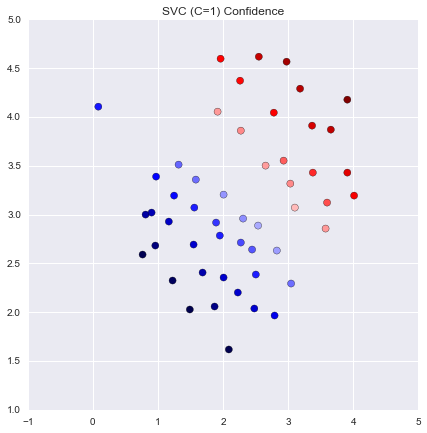

In [17]:
#Seperation by SVC along with confidence denoted by shading of points.
data["conf1"] = svc.decision_function(data[["x1", "x2"]])
plt.figure(figsize=(7,7))
plt.scatter(data["x1"], data["x2"], s=50, c=data["conf1"], cmap="seismic")
plt.title("SVC (C=1) Confidence")

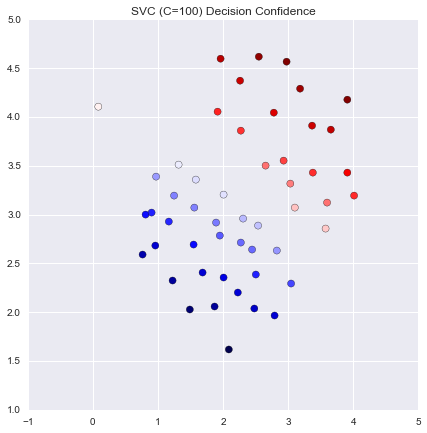

In [18]:
data["conf2"] = svc2.decision_function(data[["x1", "x2"]])
plt.figure(figsize=(7, 7))
plt.scatter(data["x1"], data["x2"], s=50, c=data["conf2"], cmap="seismic")
plt.title("SVC (C=100) Decision Confidence")

In [19]:
def gauss(x1, x2, sigma):
    return np.exp(-1.0*np.sum((x1 - x2)**2)/(2.0*sigma**2))

In [21]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

print gauss(x1, x2, sigma)

0.324652467358


In [22]:
raw = loadmat("ex6data2.mat")
data = pd.DataFrame(raw["X"], columns=["x1", "x2"])
data["y"] = raw["y"]

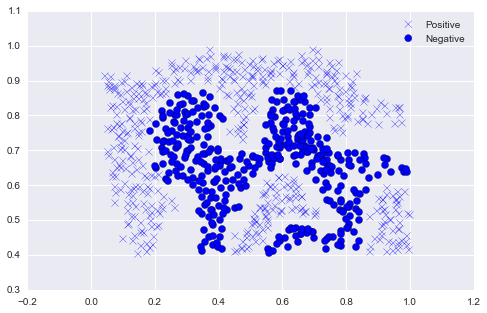

In [24]:
#A more difficult dataset with non-linear decision boundary.
pos = data[data["y"] == 1]
neg = data[data["y"] == 0]
plt.figure(figsize=(8, 5))
plt.scatter(pos["x1"], pos["x2"], s=50, label="Positive", marker="x")
plt.scatter(neg["x1"], neg["x2"], s=50, label="Negative", marker="o")
plt.legend()

In [25]:
svc = svm.SVC(C=100.0, gamma=10.0, probability=True)
svc

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=10.0, kernel='rbf', max_iter=-1, probability=True,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [26]:
svc.fit(data[["x1", "x2"]], data["y"])
svc.score(data[["x1", "x2"]], data["y"])

0.9698725376593279

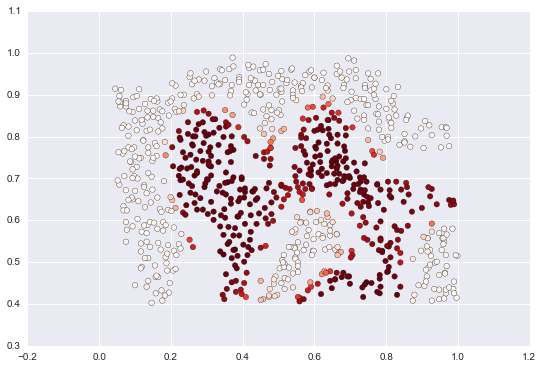

In [27]:
data["probability"] = svc.predict_proba(data[["x1", "x2"]])[:, 0]
plt.figure(figsize=(9, 6))
plt.scatter(data["x1"], data["x2"], s=30, c=data["probability"], cmap="Reds")

In [67]:
raw = loadmat("ex6data3.mat")
x = raw["X"]
xval = raw["Xval"]
y = raw["y"].ravel()
yval = raw["yval"].ravel()

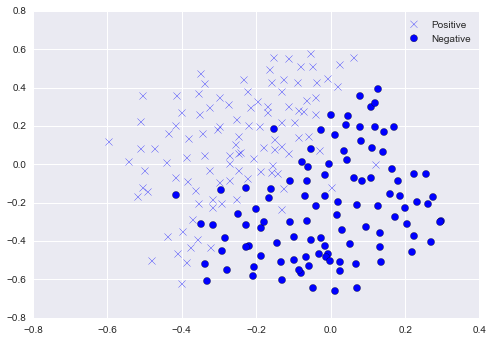

In [66]:
data = pd.DataFrame(x, columns=["x1", "x2"])
data["y"] = y
pos = data[data["y"] == 1]
neg = data[data["y"] == 0]
plt.scatter(pos["x1"], pos["x2"], s=50, marker="x", label="Positive")
plt.scatter(neg["x1"], neg["x2"], s=50, marker="o", label="Negative")
plt.legend()

In [68]:
#Conduct grid search for best combination of hyperparameters for SVM classifier.
Cvals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
C_df = []
g_df = []
scores = []
best_score = 0.0
best_params = {"C": None, "gamma": None}

In [69]:
for C in Cvals:
    for gamma in gammas:
        svc = svm.SVC(C=C, gamma=gamma)
        C_df.append(C)
        g_df.append(gamma)
        svc.fit(x, y)
        score = svc.score(xval, yval)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_params["C"] = C
            best_params["gamma"] = gamma
print "Best score:", best_score
print "Best parameters:", best_params

Best score: 0.965
Best parameters: {'C': 0.3, 'gamma': 100}


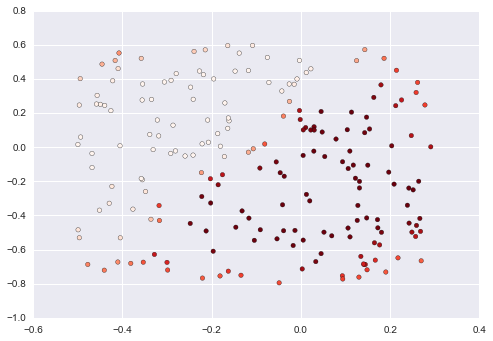

In [78]:
val = pd.DataFrame(xval, columns=["x1", "x2"])
val["y"] = yval
svc = svm.SVC(C=best_params["C"], gamma=best_params["gamma"], probability=True)
svc.fit(x, y)
val["prob"] = svc.predict_proba(xval)[:, 0]
plt.scatter(val["x1"], val["x2"], c=val["prob"], cmap="Reds")

In [51]:
data = np.column_stack((np.array(C_df), np.array(g_df), np.array(scores)))
df = pd.DataFrame(data, columns=["C", "gamma", "score"])
df.sort("score", ascending=False).head(10)

,C,gamma,score
69,30.0,10,0.965
52,3.0,30,0.965
44,1.0,100,0.965
35,0.3,100,0.965
43,1.0,30,0.960
34,0.3,30,0.960
50,3.0,3,0.960
70,30.0,30,0.960
77,100.0,3,0.955
33,0.3,10,0.955


In [33]:
from sklearn.metrics import roc_curve, auc

In [37]:
def roc_plot(xtrain, ytrain, xtest, ytest, C=1.0, kernel="rbf", gamma=1.0):
    svc = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=False)
    svc.fit(xtrain, ytrain)
    preds = svc.predict(xtest)
    fpr, tpr, thresholds = roc_curve(ytest, preds)
    area = auc(fpr, tpr) #calculate area under curve
    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, lw=2, label="ROC curve (area=%0.4f)" % area, color="orange")
    plt.xlabel("False positive rate")
    plt.title("ROC curve for SVC with $\gamma$ = %0.2f and %s kernel" %(C, kernel))
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.ylabel("True positive rate")
    plt.legend(loc="lower right")

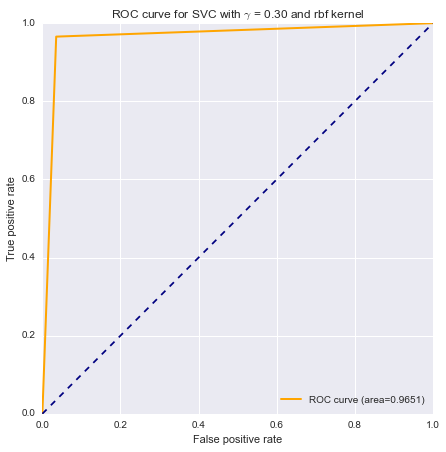

In [38]:
roc_plot(x, y, xval, yval, C=best_params["C"], kernel="rbf", gamma=best_params["gamma"])

In [52]:
train = loadmat("spamTrain.mat")
test = loadmat("spamTest.mat")

In [55]:
xtrain = train["X"]
ytrain = train["y"].ravel()
xtest = test["Xtest"]
ytest = test["ytest"].ravel()

In [56]:
print xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

(4000L, 1899L) (4000L,) (1000L, 1899L) (1000L,)


In [57]:
svc = svm.SVC()
svc.fit(xtrain, ytrain)
print "Training accuracy:", svc.score(xtrain, ytrain)

Training accuracy: 0.944


In [58]:
print "Test accuracy:", svc.score(xtest, ytest)

Test accuracy: 0.953


In [59]:
def gridsearch(Cvals, Gvals, xtrain, ytrain):
    best_score = 0.0
    best_params = {"C": None, "gamma": None}
    C_df, g_df, scores = [], [], []
    for C in Cvals:
        for g in Gvals:
            C_df.append(C)
            g_df.append(g)
            svc = svm.SVC(C=C, gamma=g)
            svc.fit(xtrain, ytrain)
            score = svc.score(xtrain, ytrain)
            scores.append(score)
            if score > best_score:
                best_score = score
                best_params["C"] = C
                best_params["gamma"] = g
    data = np.column_stack((np.array(C_df), np.array(g_df), np.array(scores)))
    df = pd.DataFrame(data, columns=["C", "gamma", "score"])
    print df.sort("score", ascending=False).head(5)
    return [best_score, best_params]

In [60]:
Cvals = [0.01, 1, 100]
gammas = [0.01, 1, 100]
results = gridsearch(Cvals, gammas, xtrain, ytrain)

     C   gamma    score
4    1    1.00  1.00000
5    1  100.00  1.00000
7  100    1.00  1.00000
8  100  100.00  1.00000
6  100    0.01  0.99975


In [61]:
best_params = results[1]
print best_params

{'C': 1, 'gamma': 1}


In [62]:
svc_best = svm.SVC(C=best_params["C"], gamma=best_params["gamma"])
svc_best.fit(xtrain, ytrain)
print "Test accuracy:", svc_best.score(xtest, ytest)

Test accuracy: 0.798
